# Bagging


Bagging (Bootstrapping Aggregating)
결정트리를 랜덤하게 만들어서 각 결정트리의 예측을 사용해 최종 예측을 만든다.


- 부트스트랩 샘플방식을 사용한다.(중복된 샘플을 뽑는 방식, 복원추출)
- 노드분할시 전체특성중에서 일부 특성을 무작위로 고른 다음 최선의 분할방식을 찾는다. 기본적으로 전체 특성개수의 제곱근만큼 특성을 선택한다.
- 기본적으로 100개의 결정트리를 사용한다.
- 분류모델의 경우에는 각 트리의 클래스별 확률을 평균하여 가장 높은 확률을 가진 클래스를 예측으로 삼는다.
- 회귀모델인 경우 단순히 각 트리의 예측을 평균한다.


![https://medium.com/@brijesh_soni/boost-your-machine-learning-models-with-bagging-a-powerful-ensemble-learning-technique-692bfc4d1a51](https://miro.medium.com/v2/resize:fit:1400/format:webp/1*a6hnuJ8WM37mLimHfMORmQ.png)


![](https://bradleyboehmke.github.io/HOML/images/bootstrap-scheme.png)


In [41]:
from statistics import LinearRegression
from turtledemo.sorting_animate import disable_keys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

# RandomForestClassifier

In [42]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

X, y = load_breast_cancer(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [43]:
# 모델 학습
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(
    random_state=42,
    max_depth=2)
rf_clf.fit(X_train, y_train)


print('학습셋 : ', rf_clf.score(X_train, y_train))
print('평가셋 : ', rf_clf.score(X_test, y_test))

학습셋 :  0.9648351648351648
평가셋 :  0.9473684210526315


In [44]:
# 부트스트랩 방식 확인
print('samples = ', len(rf_clf.estimators_samples_))  #n_estimators와 동일
# 학습기 수랑 동일하게 100개 추출 된 것임


for i, sample_index in enumerate(rf_clf.estimators_samples_[:5]):
    print(i, [int(i) for i in sorted(sample_index)])
     # 중복이 나올 수 있다 = 복원추출방식==부트스트랩방식


samples =  100
0 [0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 3, 4, 4, 5, 6, 7, 8, 8, 9, 11, 13, 14, 14, 14, 14, 15, 15, 18, 20, 22, 23, 23, 24, 25, 26, 27, 28, 32, 33, 34, 34, 34, 35, 36, 36, 37, 38, 38, 39, 41, 41, 41, 42, 45, 45, 45, 47, 48, 48, 48, 49, 52, 52, 53, 55, 57, 59, 59, 60, 62, 63, 64, 64, 64, 64, 65, 65, 65, 65, 66, 66, 67, 68, 68, 69, 69, 70, 70, 70, 70, 71, 71, 72, 73, 74, 74, 75, 77, 79, 82, 83, 84, 85, 86, 87, 88, 89, 90, 92, 93, 93, 93, 95, 95, 95, 97, 98, 99, 100, 100, 100, 102, 103, 103, 104, 104, 105, 105, 105, 108, 109, 110, 110, 113, 113, 116, 120, 120, 121, 122, 122, 125, 129, 129, 130, 131, 132, 132, 133, 135, 137, 138, 140, 140, 143, 146, 150, 156, 157, 157, 165, 165, 166, 166, 166, 169, 169, 172, 173, 173, 175, 177, 178, 178, 183, 184, 184, 187, 187, 191, 193, 193, 194, 194, 196, 198, 199, 199, 199, 200, 203, 203, 203, 205, 206, 208, 209, 211, 211, 213, 213, 214, 215, 215, 215, 215, 217, 219, 221, 221, 222, 223, 223, 223, 224, 227, 227, 228, 229, 231, 231, 232, 233, 233,

In [45]:
# 특성 중요도
cancer = load_breast_cancer()

feat_importances_ser = pd.Series(
    rf_clf.feature_importances_,
    index = cancer.feature_names
)

feat_importances_ser.sort_values(ascending=False)

feat_importances_ser

mean radius                0.079443
mean texture               0.001753
mean perimeter             0.082240
mean area                  0.056182
mean smoothness            0.000493
mean compactness           0.012350
mean concavity             0.065683
mean concave points        0.107360
mean symmetry              0.000000
mean fractal dimension     0.001206
radius error               0.012367
texture error              0.001197
perimeter error            0.005062
area error                 0.031985
smoothness error           0.000000
compactness error          0.002566
concavity error            0.000682
concave points error       0.000319
symmetry error             0.000000
fractal dimension error    0.000238
worst radius               0.106104
worst texture              0.004029
worst perimeter            0.070185
worst area                 0.157883
worst smoothness           0.003725
worst compactness          0.016590
worst concavity            0.036289
worst concave points       0

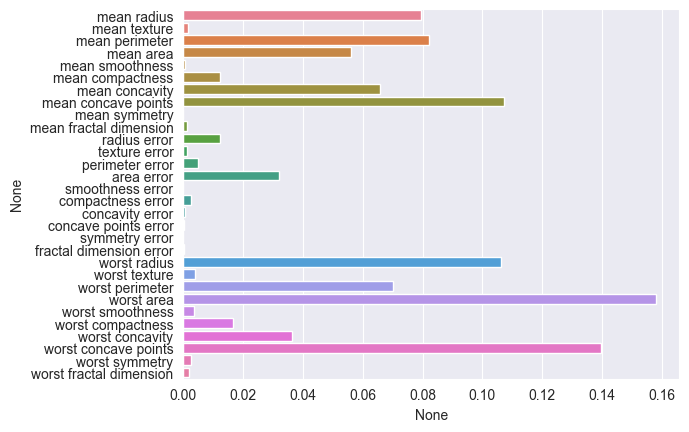

In [46]:
# 시각화
sns.barplot(
    x = feat_importances_ser,
    y = feat_importances_ser.index,
    hue = feat_importances_ser.index
)

plt.show()

### 일반화 성능
- cross_val_score / cross_validate
- oob_score

In [47]:
# cross_validate
from sklearn.model_selection import cross_validate
rf_clf = RandomForestClassifier(random_state=42, max_depth=3)
                                                # 10 으로 설정하면 과적합

results = cross_validate(
    rf_clf,
    X_train,
    y_train,
    cv=3,
    return_train_score=True, # 각 fold마다 훈련 정확도(train_score) 반환.
    verbose=1 # 교차검증 진행과정을 출력 == 로그 찍는 거

)
print("Train Acc : ", np.mean(results["train_score"]))
print('Test Acc : ', np.mean(results["test_score"]))


Train Acc :  0.9879132650107115
Test Acc :  0.9494161728825374


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.6s finished


#### oob_score
`RandomForestClassifier`에서 `oob_score`는 **Out-Of-Bag Score**의 약자로, 랜덤 포레스트의 **교차 검증 없이 모델의 일반화 성능을 평가할 수 있는 방법**이다.


랜덤 포레스트는 각 결정 트리를 만들 때 **부트스트랩 샘플링**을 사용한다. 이 과정에서 전체 데이터 중 일부만 샘플링되고, **선택되지 않은 데이터들**이 생긴다. 이걸 **OOB(Out-Of-Bag) 데이터**라고 부른다.




**OOB Score의 의미**


* 각 트리는 자신이 학습하지 않은 OOB 데이터에 대해 예측을 할 수 있음.
* 전체 트리들이 각자의 OOB 샘플에 대해 예측한 결과들을 모아 **평균 정확도 또는 확률을 계산**함.
* 결과적으로 전체 모델의 **일종의 검증 정확도 역할**을 함.
* 학습 데이터 내에서 자체 검증 가능 → 빠름


> 아래와 같이 샘플기준으로 트리별 예측 확률을 평균하여 최종 예측 확률을 계산한다.
> **결정트리 기준이 아닌 sample 기준으로 평균 (OOB 예측 불가한 샘플이 있다면, [0, 0] 처리)**


| 샘플 | 트리1 | 트리2 | 트리3 | OOB 트리들 | OOB 예측          |
| -- | --- | --- | --- | ------- | --------------- |
| x₁ | 사용  | OOB | OOB | 2, 3    | 평균값(2,3 예측)     |
| x₂ | 사용  | 사용  | OOB | 3       | 트리3 예측          |
| x₃ | 사용  | 사용  | 사용  | 없음      | OOB 예측 불가 () |


In [48]:
# oob_score=True: oob 데이터를 활용해 검증 평가 진행
rf_clf = RandomForestClassifier(random_state=42, max_depth=10, oob_score=True)
rf_clf.fit(X_train, y_train)

print('Train Score :', rf_clf.score(X_train, y_train))
print('OOB Score :', rf_clf.oob_score_) # 실제 검증 점수
print(rf_clf.oob_decision_function_.shape)

Train Score : 1.0
OOB Score : 0.9538461538461539
(455, 2)


## RandomForestRegressor

## 당뇨병 회귀 에측

In [49]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
diabetes_df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
diabetes_df['target']  = diabetes.target
diabetes_df.head() # StandardScaler 방식으로 되어있음

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [50]:
# 데이터 분할
X, y = diabetes.data, diabetes.target

X_train, X_test, y_train, y_test = train_test_split(X, y,
    random_state=42, test_size=0.2,
)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(353, 10) (353,)
(89, 10) (89,)


In [51]:
# 모델 학습/평가
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor


rf_reg = RandomForestRegressor(n_estimators=1000, random_state=42, max_depth=5)
rf_reg.fit(X_train, y_train)

print("Train r2 : ", rf_reg.score(X_train, y_train))
print("Train MSE :", mean_squared_error(y_train, rf_reg.predict(X_train)))


print("Test r2 : ", rf_reg.score(X_test, y_test))
print("Test MSE :", mean_squared_error(y_test, rf_reg.predict(X_test)))

Train r2 :  0.7391445683514353
Train MSE : 1585.0614265455824
Test r2 :  0.46286925955687097
Test MSE : 2845.800171660781


In [52]:
# 특성 중요도
feature_importances_df = pd.DataFrame({
    'feature': diabetes.feature_names,
    'importance' : rf_reg.feature_importances_

}).sort_values(by='importance', ascending=False)
feature_importances_df


,feature,importance
2,bmi,0.411591
8,s5,0.281800
3,bp,0.083955
9,s6,0.050582
5,s2,0.042958
0,age,0.037519
4,s1,0.033360
6,s3,0.032854
7,s4,0.020200
1,sex,0.005181


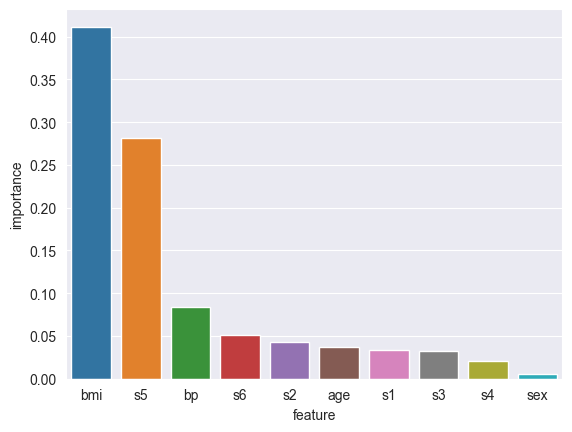

In [53]:
sns.barplot(feature_importances_df, x='feature', y='importance', hue='feature')
plt.show()

In [54]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV

# 하이퍼파라미터 최적화
model = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('rf', RandomForestRegressor(random_state=42))
])


param_grid = {
    'poly__degree': [2, 3],
    'rf__n_estimators': [100, 500],
    'rf__max_depth': [3, 5, 7],
    'rf__min_samples_split': [2, 3],
}

grid_search = GridSearchCV(model, param_grid, cv=3, n_jobs=-1, scoring='r2', verbose=1 )
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


,estimator,Pipeline(step...m_state=42))])
,param_grid,"{'poly__degree': [2, 3], 'rf__max_depth': [3, 5, ...], 'rf__min_samples_split': [2, 3], 'rf__n_estimators': [100, 500]}"
,scoring,'r2'
,n_jobs,-1
,refit,True
,cv,3
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,degree,3


In [55]:
# 평가
print('Best params:', grid_search.best_params_)
print('Best score:', grid_search.best_score_)


Best params: {'poly__degree': 3, 'rf__max_depth': 5, 'rf__min_samples_split': 3, 'rf__n_estimators': 100}
Best score: 0.4434974162571738
